In [1]:
import pandas as pd

df = pd.read_excel('data/data.xlsx')
df

,type,name,company,salary,city,experience,edu
0,python,Python,中国电信云,20-40K·17薪,北京,经验不限,本科
1,python,Python,奇虎360,20-40K·15薪,北京,3-5年,大专
2,python,Python,VIPKID,20-40K·14薪,北京,5-10年,本科
3,python,python工程师,天阳科技,12-24K,北京,1-3年,本科
4,python,python开发,武汉佰钧成,12-17K,北京,3-5年,大专
...,...,...,...,...,...,...,...
9763,产品经理,产品经理,公众智能,8-10K,西安,3-5年,本科
9764,产品经理,产品经理,微感,8-10K,西安,3-5年,大专
9765,产品经理,产品经理,巴斯光年,10-20K,西安,3-5年,本科
9766,产品经理,产品经理（农药）,西大华特科技,5-8K,西安,1-3年,硕士


In [2]:
# 去除重复的数据
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [3]:
# 数据的行和列
df.shape

(9768, 7)

In [4]:
# 去除空值
df.dropna(axis=0, how='any')
df.isnull().sum()

type          0
name          0
company       0
salary        0
city          0
experience    0
edu           0
dtype: int64

In [5]:
# 查看数据的结构
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768 entries, 0 to 9767
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        9768 non-null   object
 1   name        9768 non-null   object
 2   company     9768 non-null   object
 3   salary      9768 non-null   object
 4   city        9768 non-null   object
 5   experience  9768 non-null   object
 6   edu         9768 non-null   object
dtypes: object(7)
memory usage: 534.3+ KB


In [6]:
# 计算工资范围的最低值（取-前数字）
df['low'] = df['salary'].str.extract('(\d+)')
# 计算工资范围的最高值（取-后数字）
df['high'] = df['salary'].str.extract('-(\d+)')
# 没有范围的用低值填充
df['high'].fillna(df['low'],inplace = True)


In [7]:
# 计算x薪 / 12月的比值
df['k'] = df['salary'].str.extract('·(\d{2})')
# salary没有·的元素为空值，用12填充
df['k'].fillna(12,inplace = True)
df['k'] = df['k'].astype('float64')
df['k'] = df['k'] / 12

In [8]:
# 计算平均工资
df['low'] = df['low'].astype('float64')
df['high'] = df['high'].astype('float64')
df['avg'] = (df['low'] + df['high']) / 2 * df['k']
df['avg'] = df['avg'].astype('float64')
df

,type,name,company,salary,city,experience,edu,low,high,k,avg
0,python,Python,中国电信云,20-40K·17薪,北京,经验不限,本科,20.0,40.0,1.416667,42.5
1,python,Python,奇虎360,20-40K·15薪,北京,3-5年,大专,20.0,40.0,1.250000,37.5
2,python,Python,VIPKID,20-40K·14薪,北京,5-10年,本科,20.0,40.0,1.166667,35.0
3,python,python工程师,天阳科技,12-24K,北京,1-3年,本科,12.0,24.0,1.000000,18.0
4,python,python开发,武汉佰钧成,12-17K,北京,3-5年,大专,12.0,17.0,1.000000,14.5
...,...,...,...,...,...,...,...,...,...,...,...
9763,产品经理,产品经理,公众智能,8-10K,西安,3-5年,本科,8.0,10.0,1.000000,9.0
9764,产品经理,产品经理,微感,8-10K,西安,3-5年,大专,8.0,10.0,1.000000,9.0
9765,产品经理,产品经理,巴斯光年,10-20K,西安,3-5年,本科,10.0,20.0,1.000000,15.0
9766,产品经理,产品经理（农药）,西大华特科技,5-8K,西安,1-3年,硕士,5.0,8.0,1.000000,6.5


In [9]:
df['edu'].unique()

array(['本科', '大专', '硕士', '高中', '学历不限', '博士', '中专'], dtype=object)

In [10]:
df['experience'].unique()

array(['经验不限', '3-5年', '5-10年', '1-3年', '应届生', '1年以内', '10年以上'],
      dtype=object)

In [11]:
df['edu'].value_counts()

edu
本科      7741
大专      1383
学历不限     332
硕士       254
高中        28
中专        20
博士        10
Name: count, dtype: int64

In [12]:
df['type'].value_counts()

type
产品经理      2680
java      2669
数据分析      2410
python    2009
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
# 设置字体微软雅黑，加粗，大小12
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

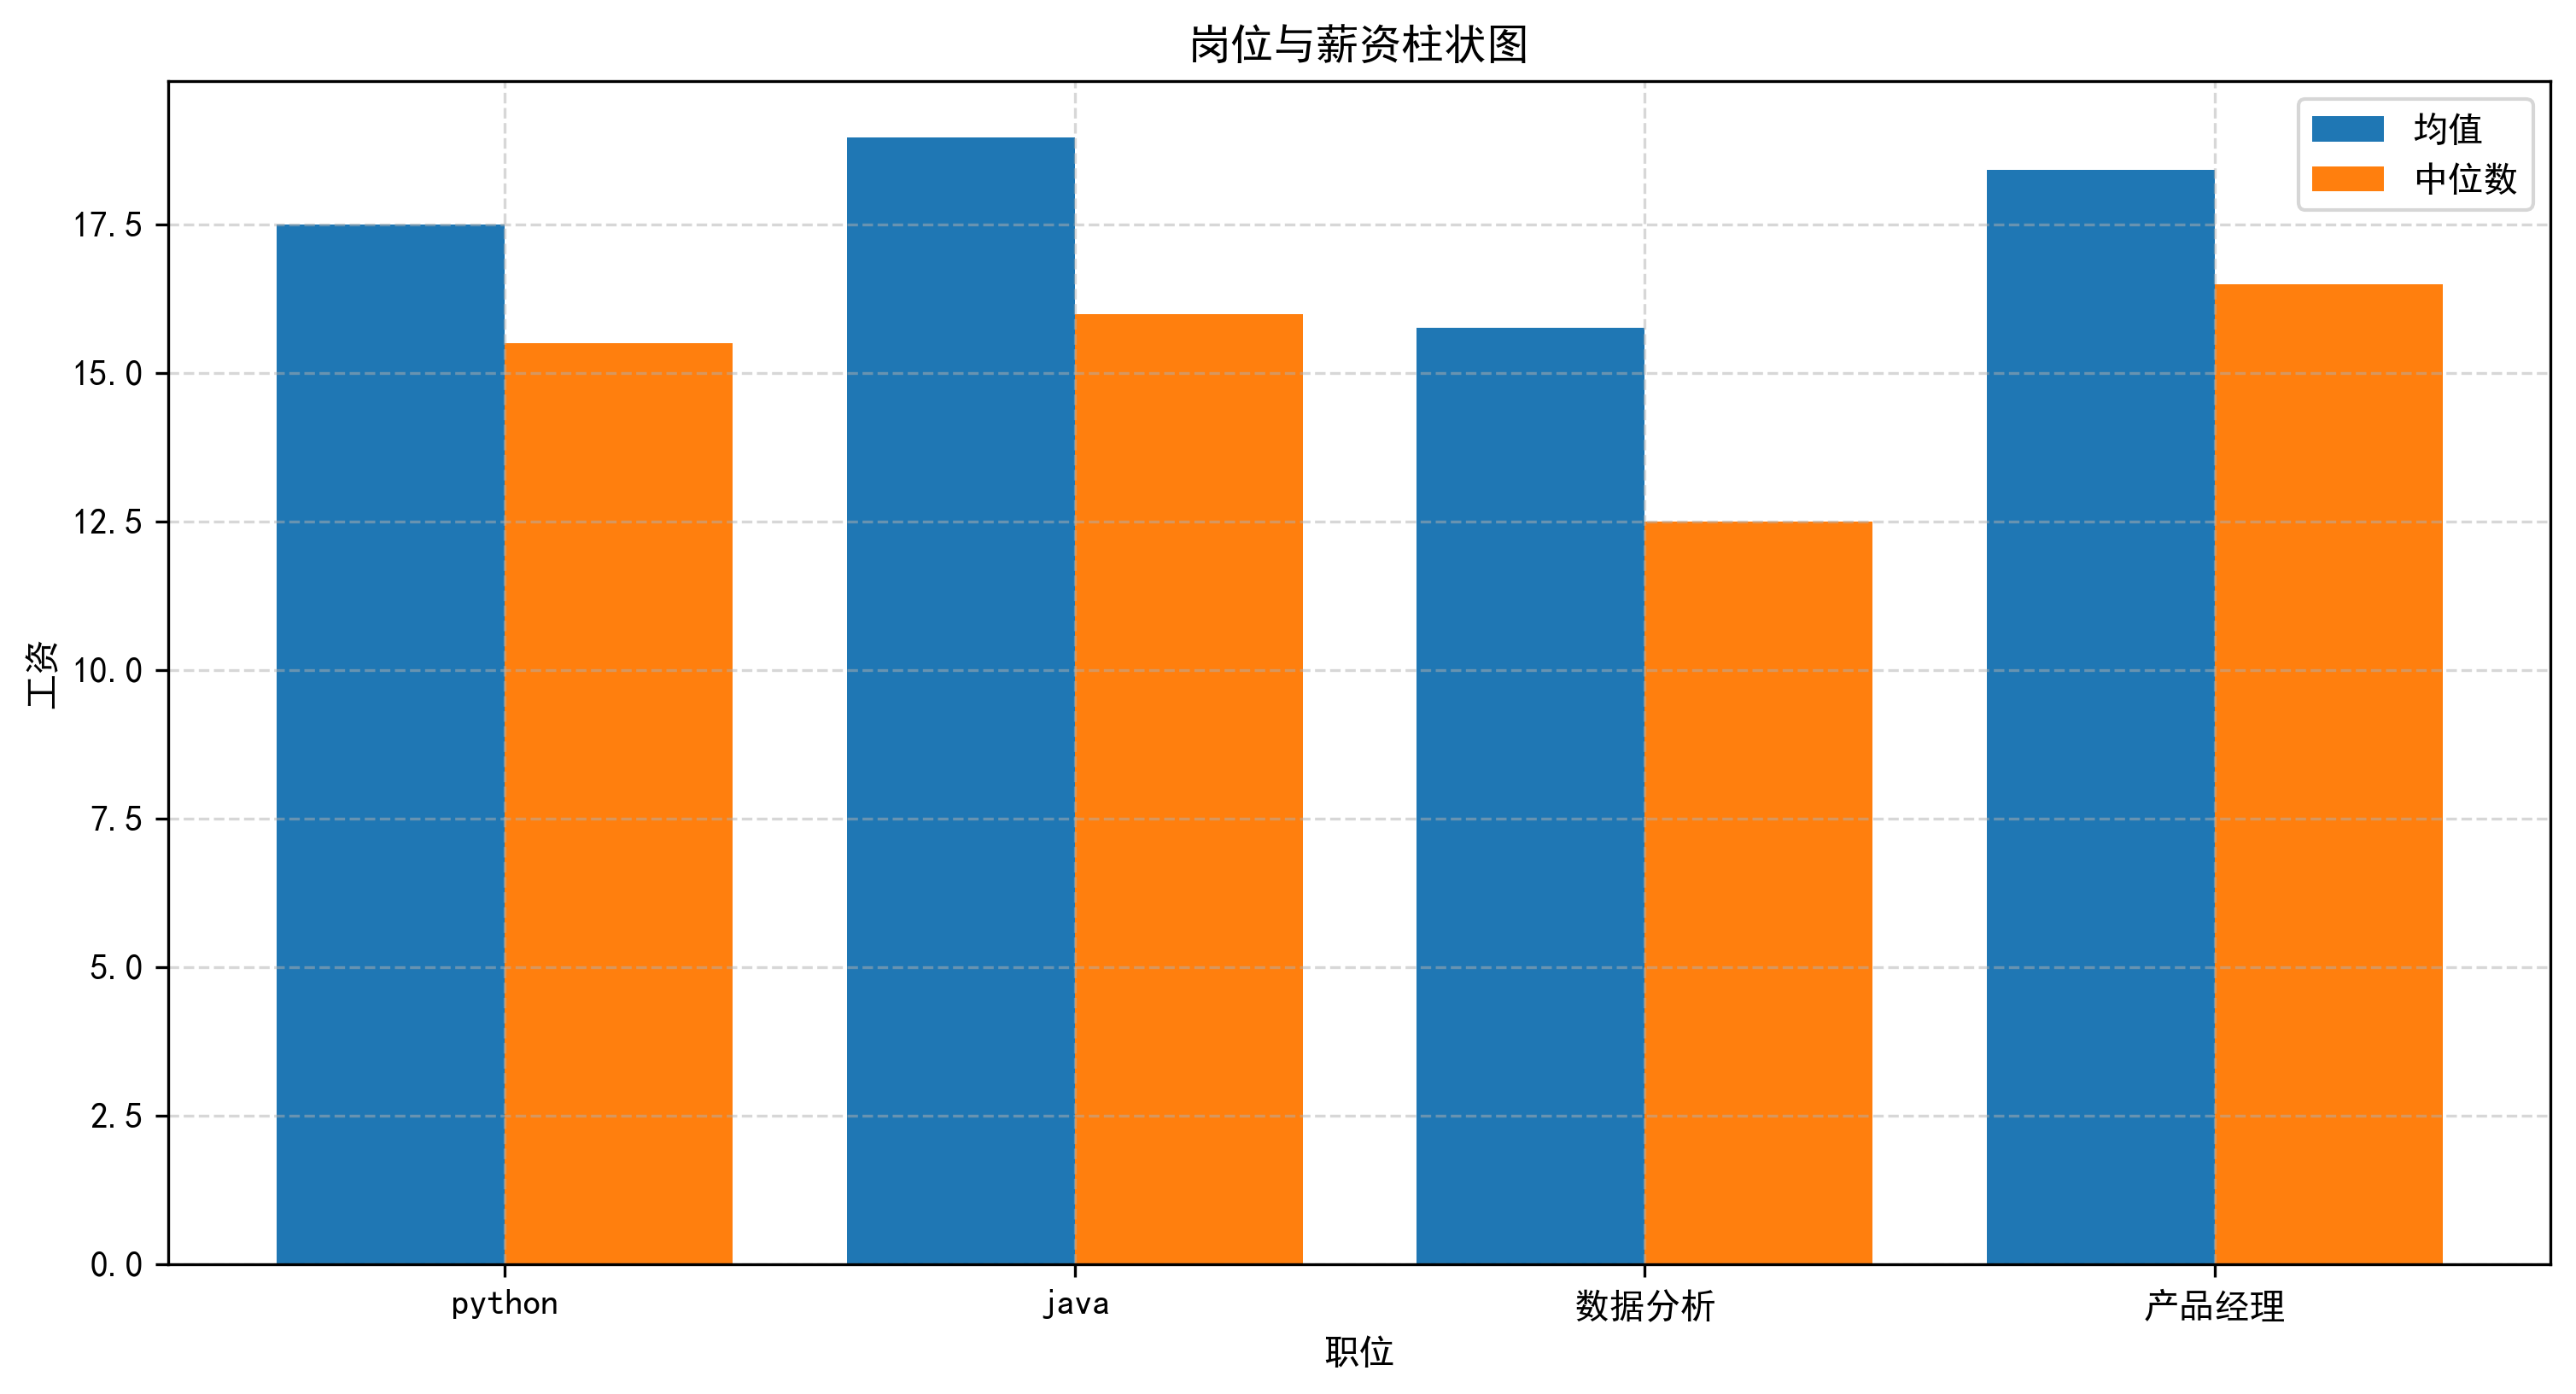

In [14]:
# 长12，宽6，像素300
plt.figure(figsize = (12, 6), dpi = 300)
# 均值
y1 = [df[df['type']=='python']['avg'].mean(),df[df['type']=='java']['avg'].mean(),df[df['type']=='数据分析']['avg'].mean(),df[df['type']=='产品经理']['avg'].mean()]
# 中位数
y2 = [df[df['type']=='python']['avg'].median(),df[df['type']=='java']['avg'].median(),df[df['type']=='数据分析']['avg'].median(),df[df['type']=='产品经理']['avg'].median()]
# 横坐标
x1 = ['python', 'java', '数据分析', '产品经理']
# 绘制柱状图
plt.bar([1, 2, 3, 4], y1, width = 0.4, label = '均值')
plt.bar([1.4, 2.4, 3.4, 4.4], y2, width = 0.4, label = '中位数')
plt.xticks([1.2, 2.2, 3.2, 4.2], x1)

plt.ylabel('工资')
plt.xlabel('职位')
plt.legend(['均值','中位数'])
plt.title("岗位与薪资柱状图")
# 绘制网格
plt.grid(alpha=0.5, linestyle='--')
plt.show()

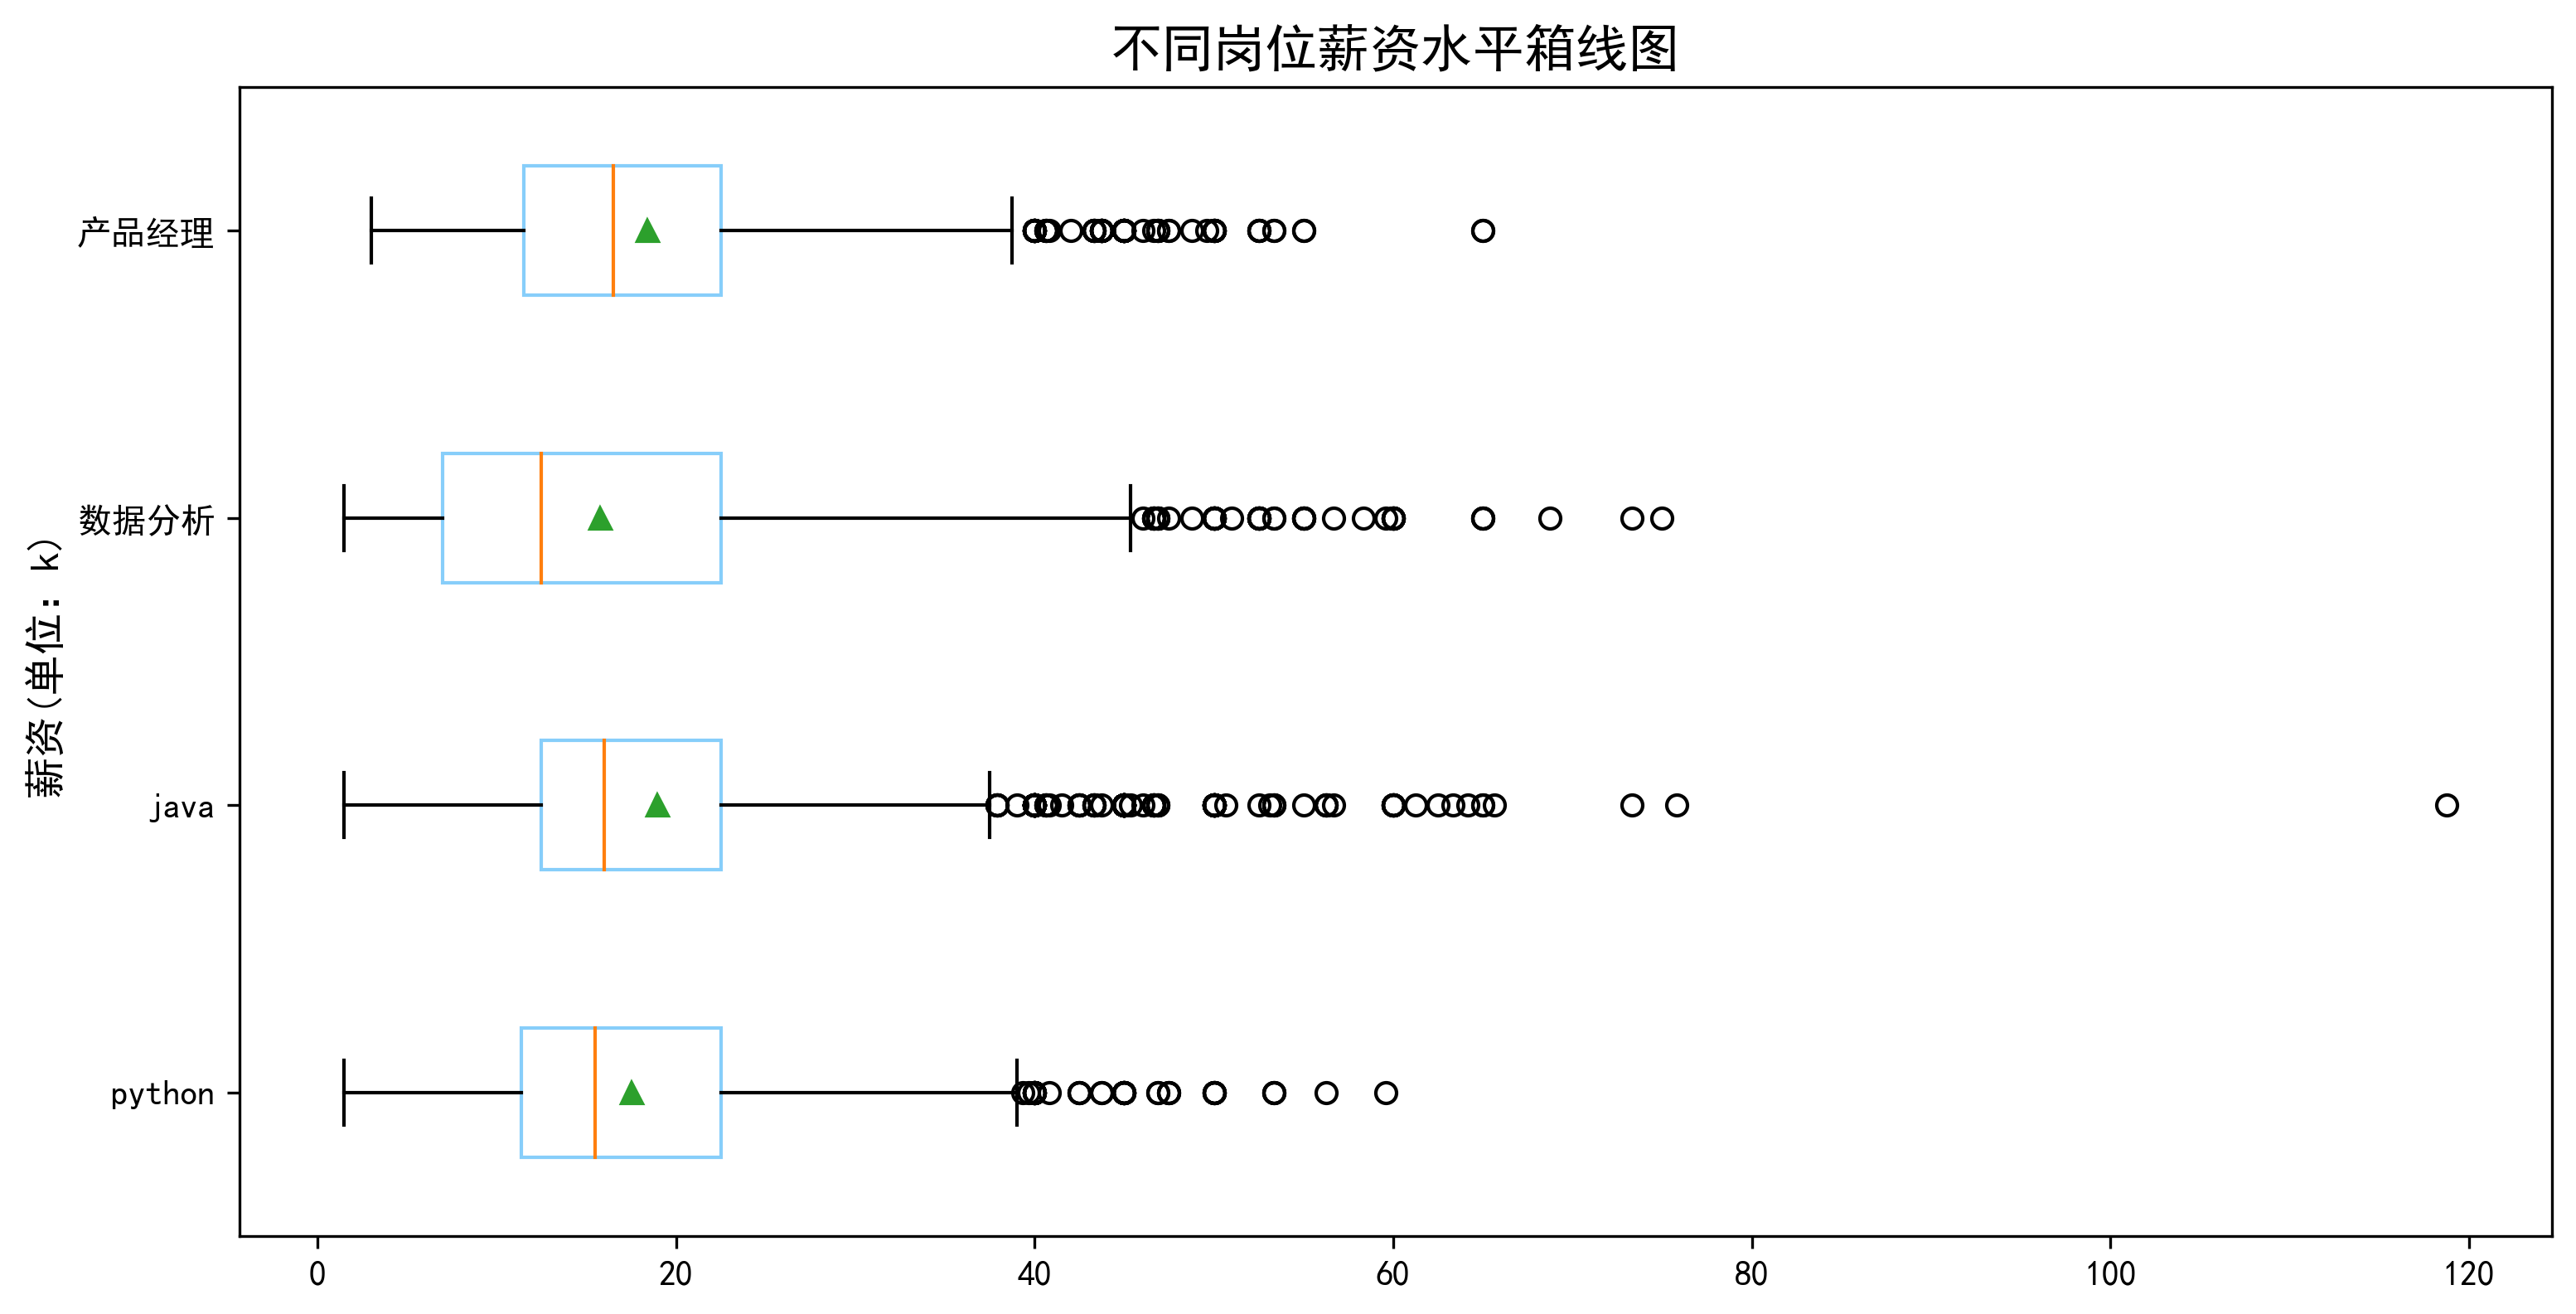

In [15]:
plt.figure(figsize = (12, 6), dpi = 300)

data1 = df[df['type']=='python']['avg']
data2 = df[df['type']=='java']['avg']
data3 = df[df['type']=='数据分析']['avg']
data4 = df[df['type']=='产品经理']['avg']
x1 = ['python', 'java', '数据分析', '产品经理']

plt.boxplot([data1,data2,data3,data4],labels=x1,vert=False,showmeans=True,patch_artist=True,boxprops={'color':'lightskyblue','facecolor':'white'})
plt.title('不同岗位薪资水平箱线图',fontsize=15)
plt.ylabel('薪资(单位：k)',fontsize=12)
plt.show()

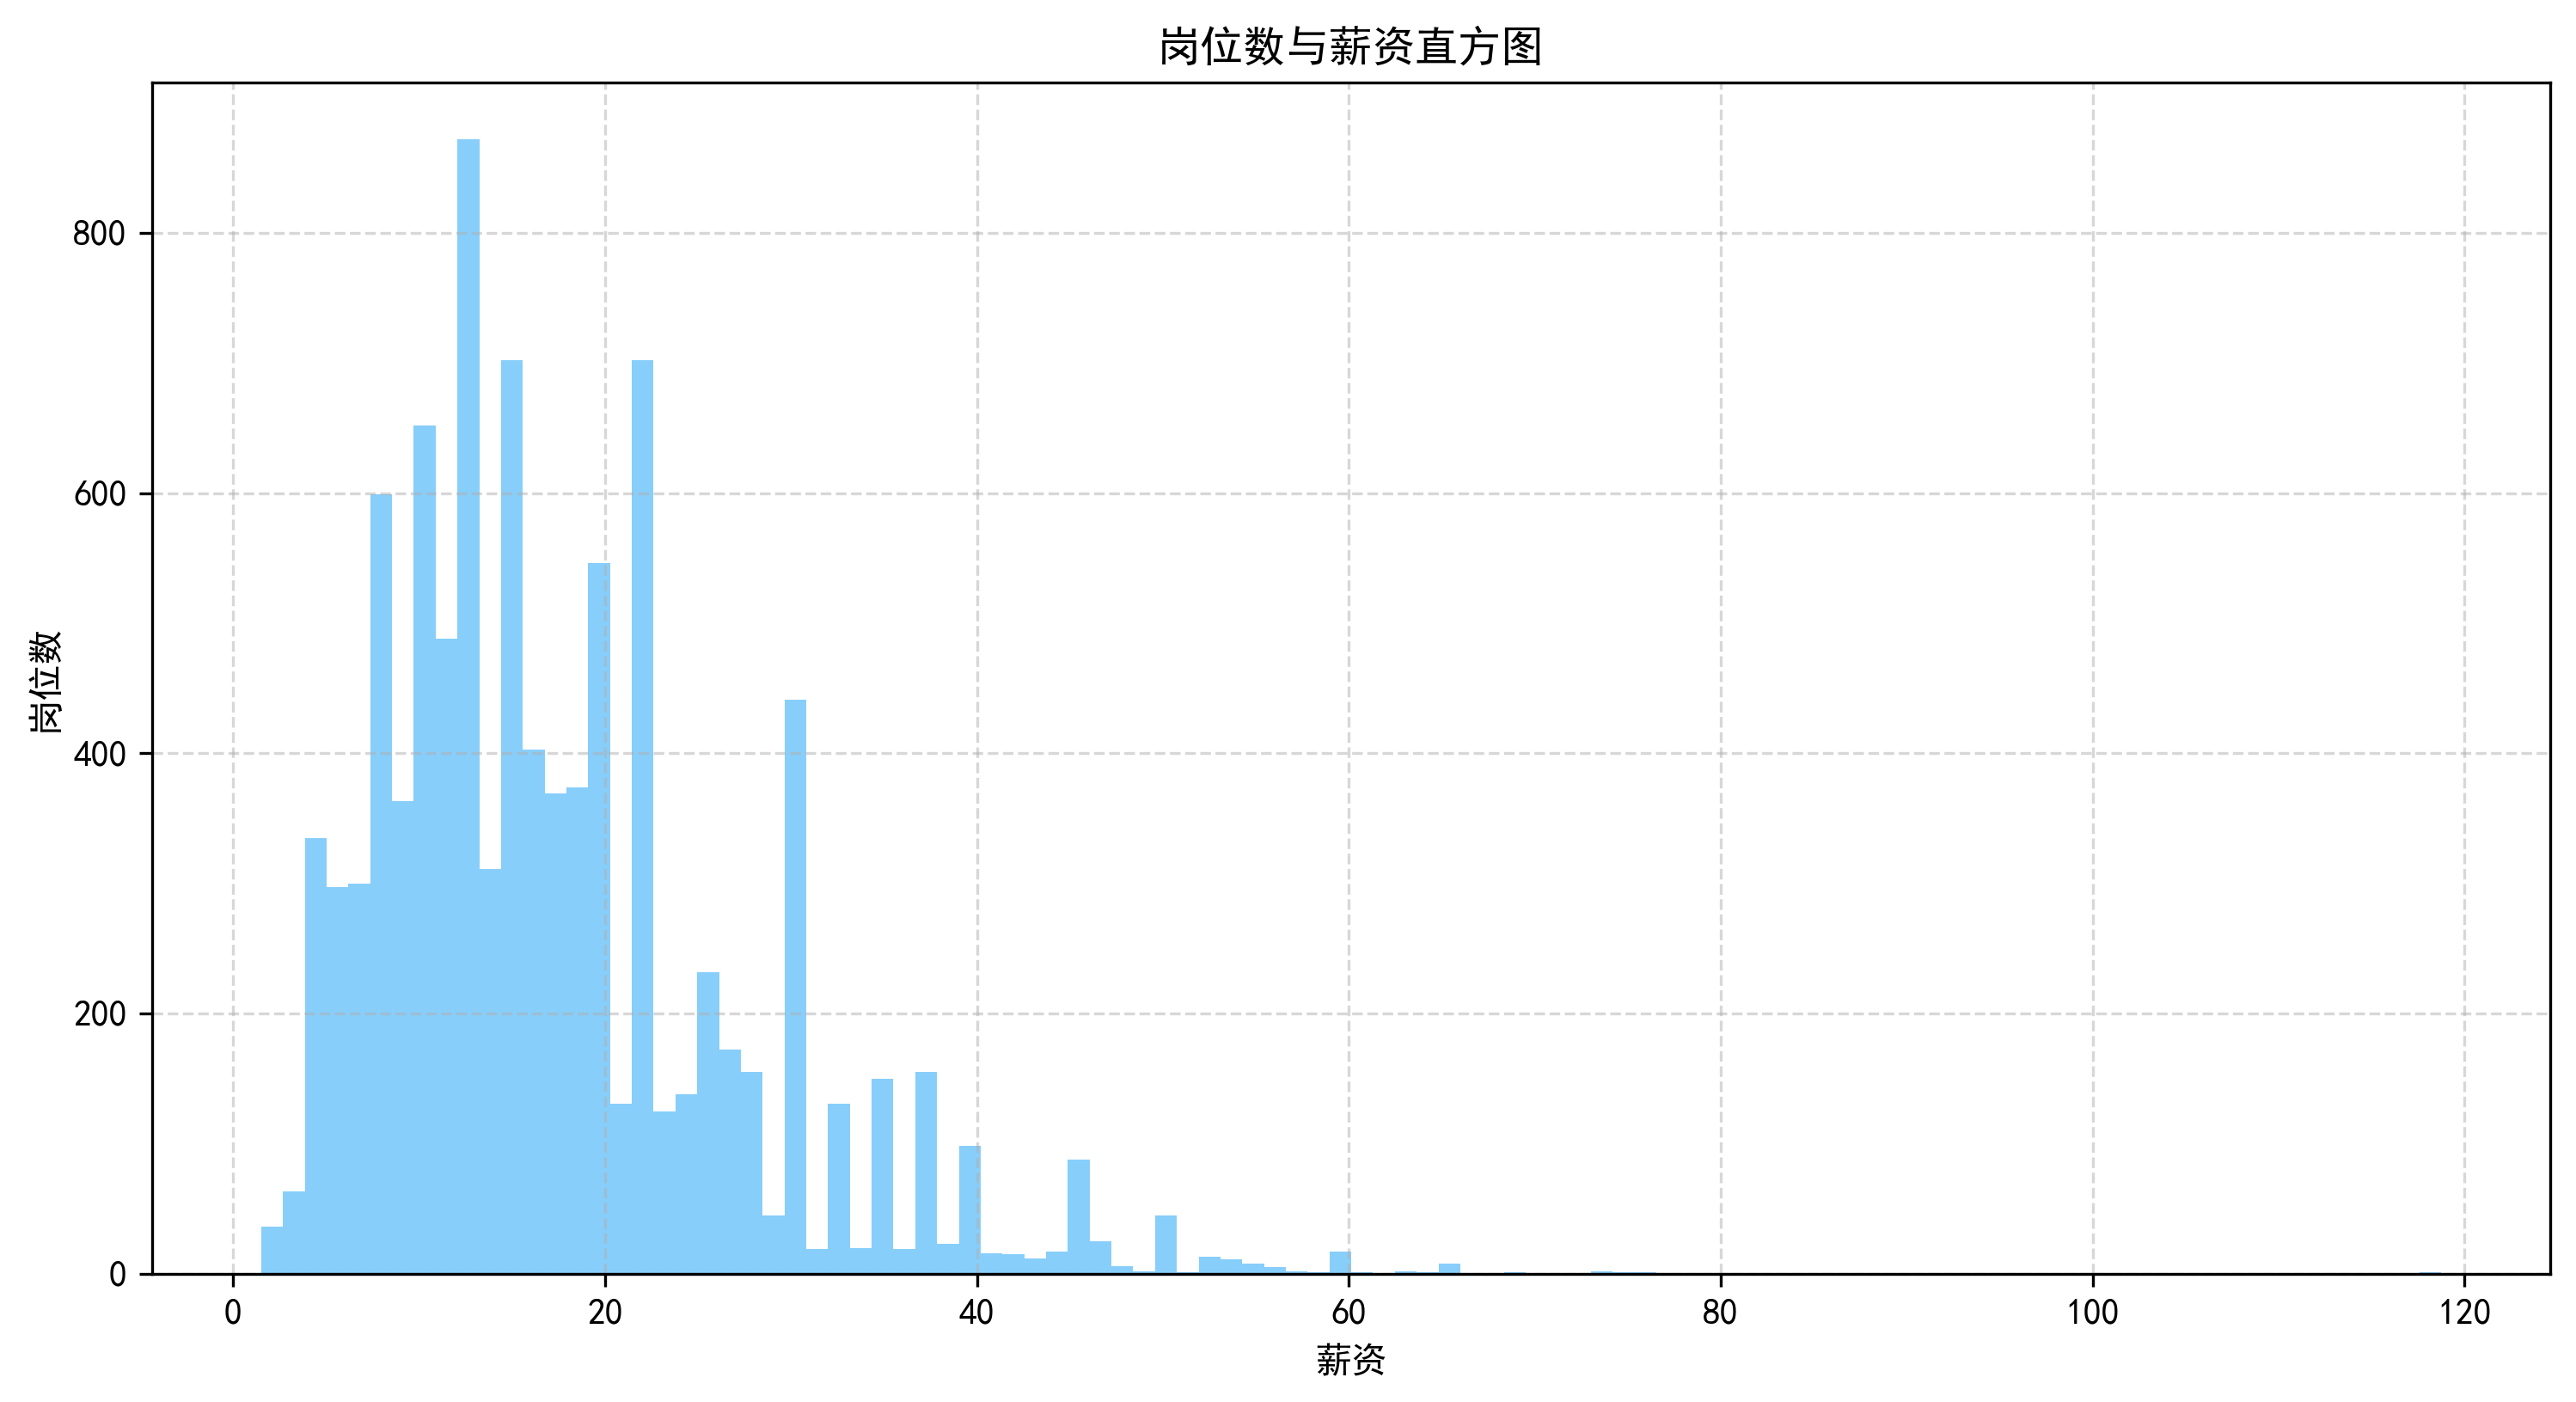

In [16]:
# 像素300
plt.figure(figsize = (12, 6), dpi = 300)
# 直方图
plt.hist(df['avg'], bins = 100, alpha = 1, color = 'lightskyblue', linestyle = '-')
plt.ylabel('岗位数')
plt.xlabel('薪资')
plt.title("岗位数与薪资直方图")
# 绘制网格
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [17]:
df['edu'].value_counts()

edu
本科      7741
大专      1383
学历不限     332
硕士       254
高中        28
中专        20
博士        10
Name: count, dtype: int64

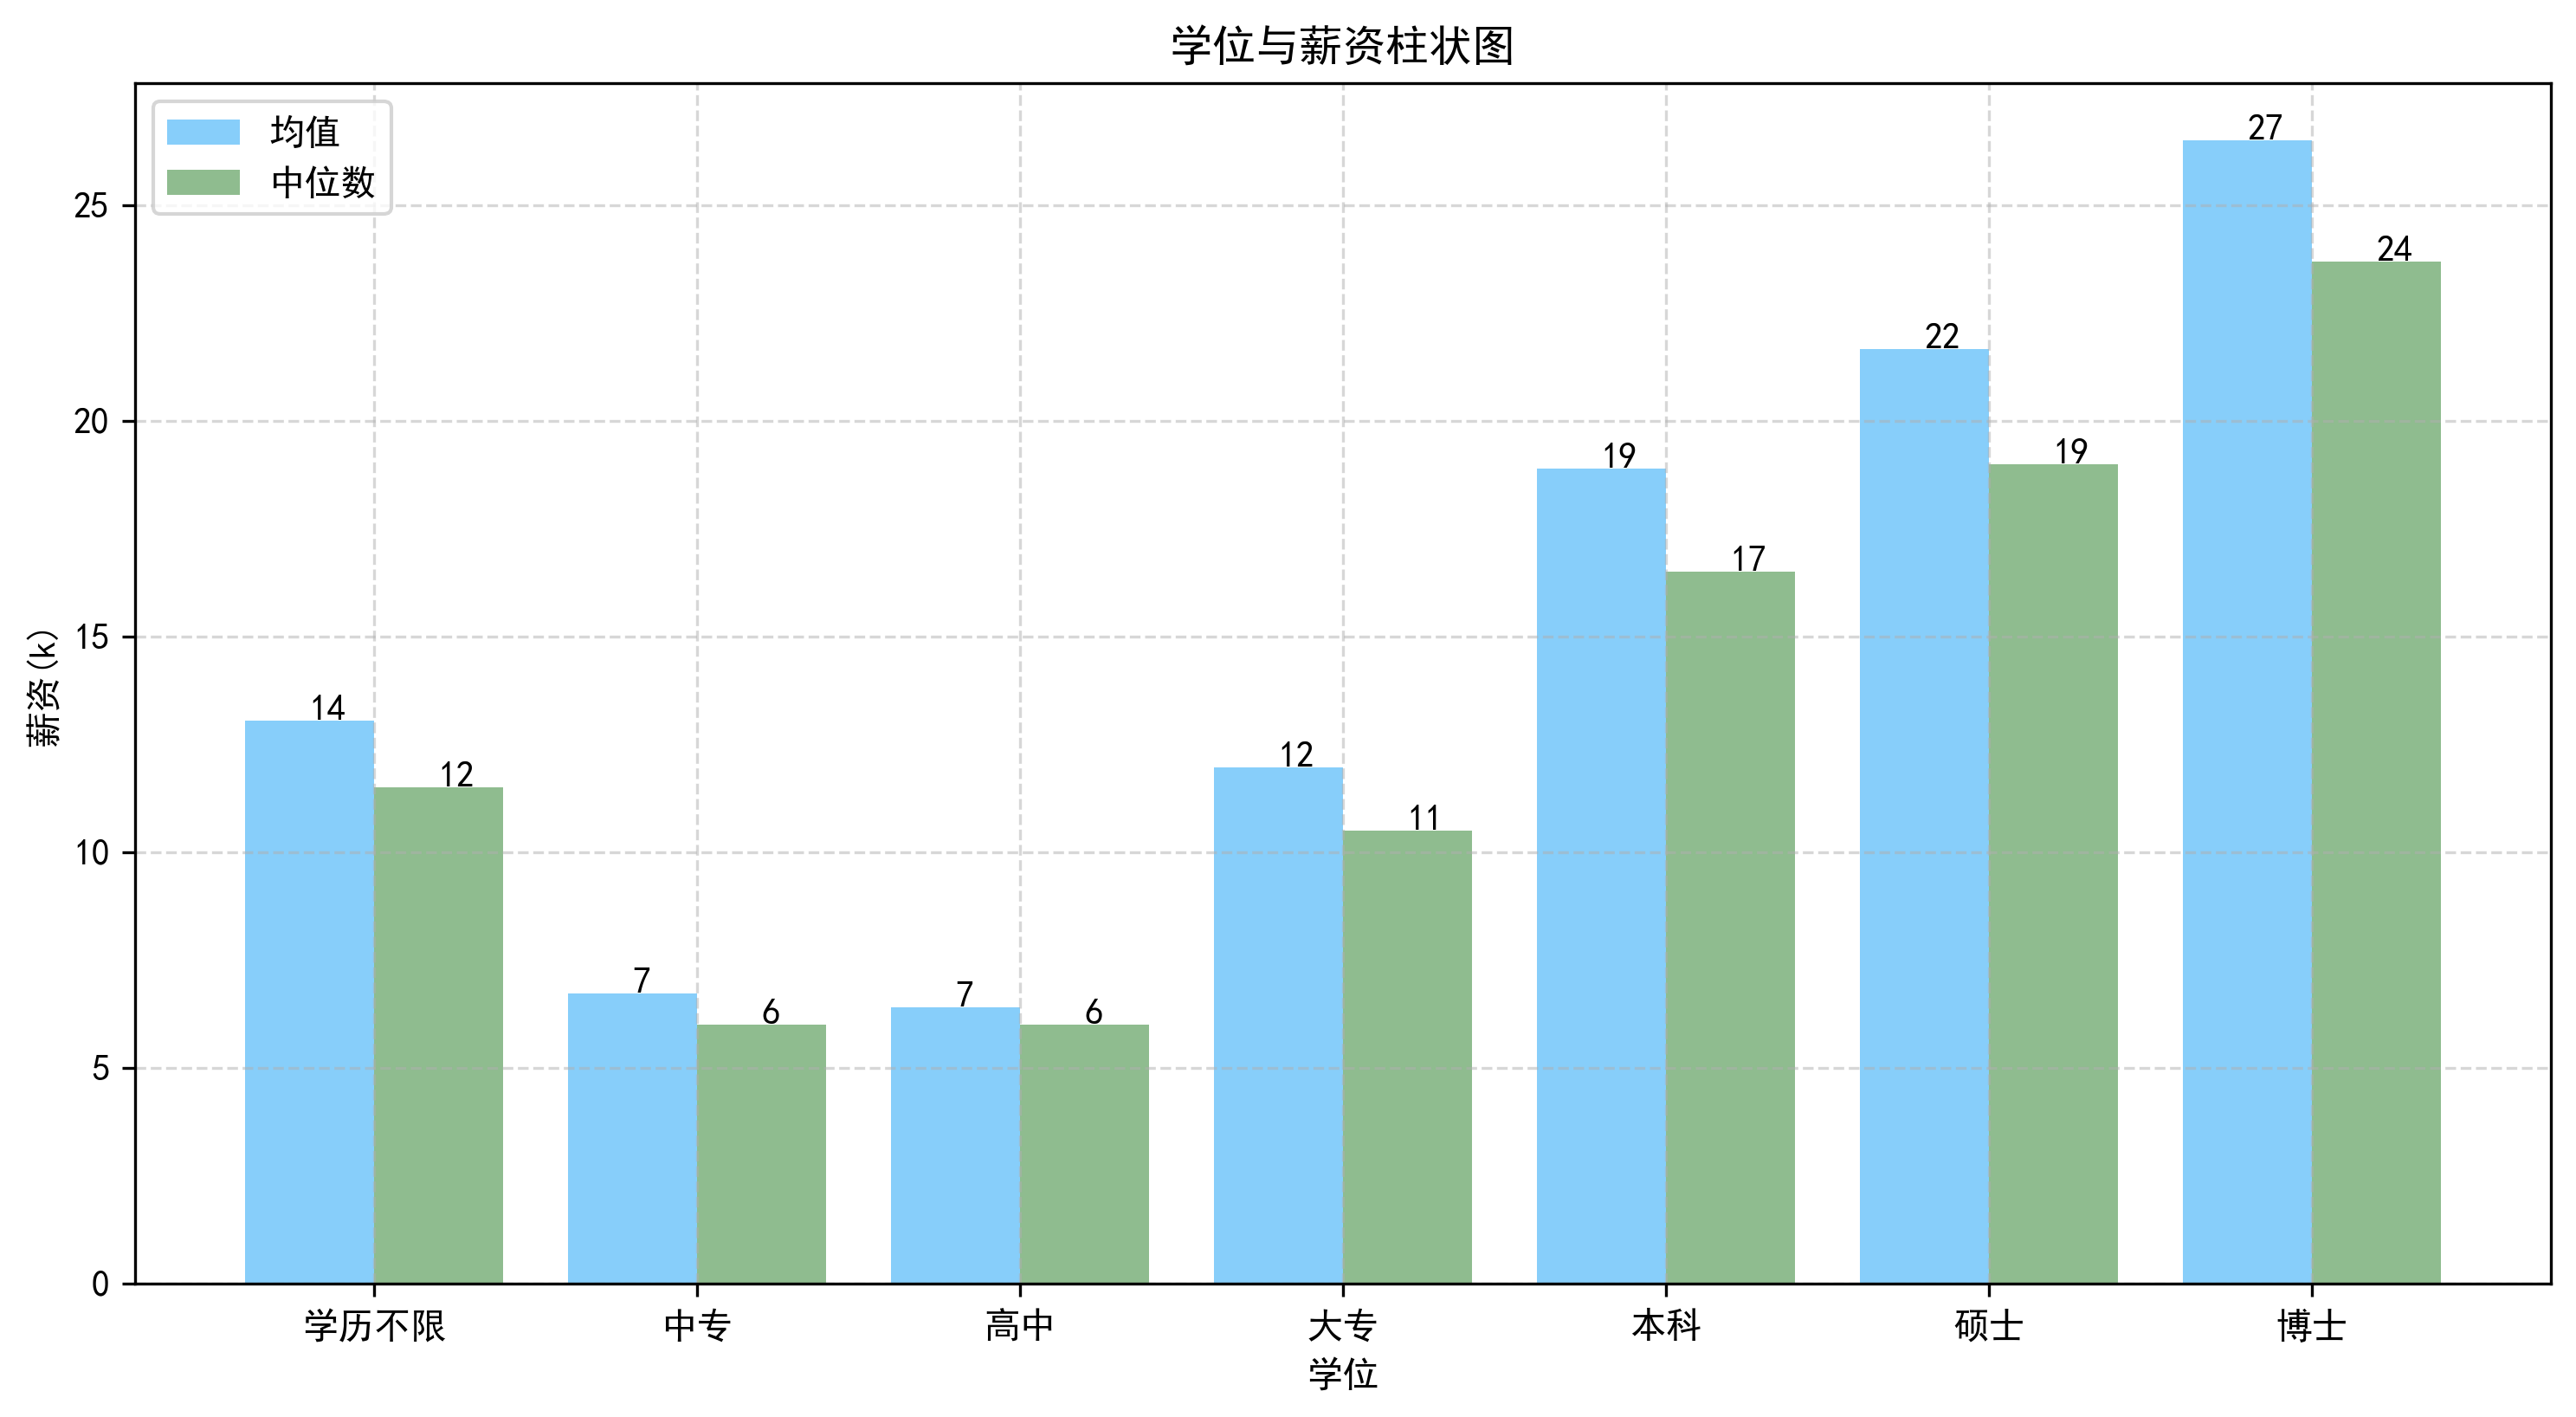

In [18]:
import math
# 像素300
plt.figure(figsize = (12, 6), dpi = 300)
# 计算均值
y1 = [df[df['edu']=='学历不限']['avg'].mean(), df[df['edu']=='中专']['avg'].mean(), df[df['edu']=='高中']['avg'].mean()]
y1 = y1 + [df[df['edu']=='大专']['avg'].mean(), df[df['edu']=='本科']['avg'].mean(), df[df['edu']=='硕士']['avg'].mean()]
y1 = y1 + [df[df['edu']=='博士']['avg'].mean()]
# 计算中位数
y2 = [df[df['edu']=='学历不限']['avg'].median(), df[df['edu']=='中专']['avg'].median(), df[df['edu']=='高中']['avg'].median()]
y2 = y2 + [df[df['edu']=='大专']['avg'].median(), df[df['edu']=='本科']['avg'].median(), df[df['edu']=='硕士']['avg'].median()]
y2 = y2 + [df[df['edu']=='博士']['avg'].median()]
# X轴坐标
x1 = ['学历不限', '中专', '高中', '大专', '本科', '硕士', '博士']
#绘制柱状图
plt.bar([1, 2, 3, 4, 5, 6, 7], y1, width = 0.4, color = 'lightskyblue', label = '均值')
plt.bar([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4], y2, width = 0.4, color = 'darkseagreen', label = '中位数')
plt.xticks([1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2], x1)
plt.ylabel('薪资(k)')
plt.xlabel('学位')
plt.legend(['均值','中位数'])
plt.title("学位与薪资柱状图")

# 薪资标签
for i, j in zip([1, 2, 3, 4, 5, 6, 7], y1):
    plt.text(i, j, '{}'.format(math.ceil(j)))
for i, j in zip([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4], y2):
    plt.text(i, j, '{}'.format(math.ceil(j)))

# 绘制网格
plt.grid(alpha=0.5, linestyle='--')
plt.show()


In [19]:
from pyecharts.charts import Pie,Funnel,Map,Page,Bar,Sankey
from pyecharts import options as opts 
# 饼图
p = Pie()
p.add('', [list(z) for z in zip(['本科', '大专', '学历不限', '硕士', '高中', '中专', '博士'], df['edu'].value_counts())], radius=['35%', '60%'], rosetype='radius')
p.set_global_opts(title_opts=opts.TitleOpts(title='工资分布'), legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
p.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
p.render_notebook()


In [20]:
df['experience'].value_counts()

experience
3-5年     4277
1-3年     2186
5-10年    1591
经验不限     1174
1年以内      352
应届生       144
10年以上      44
Name: count, dtype: int64

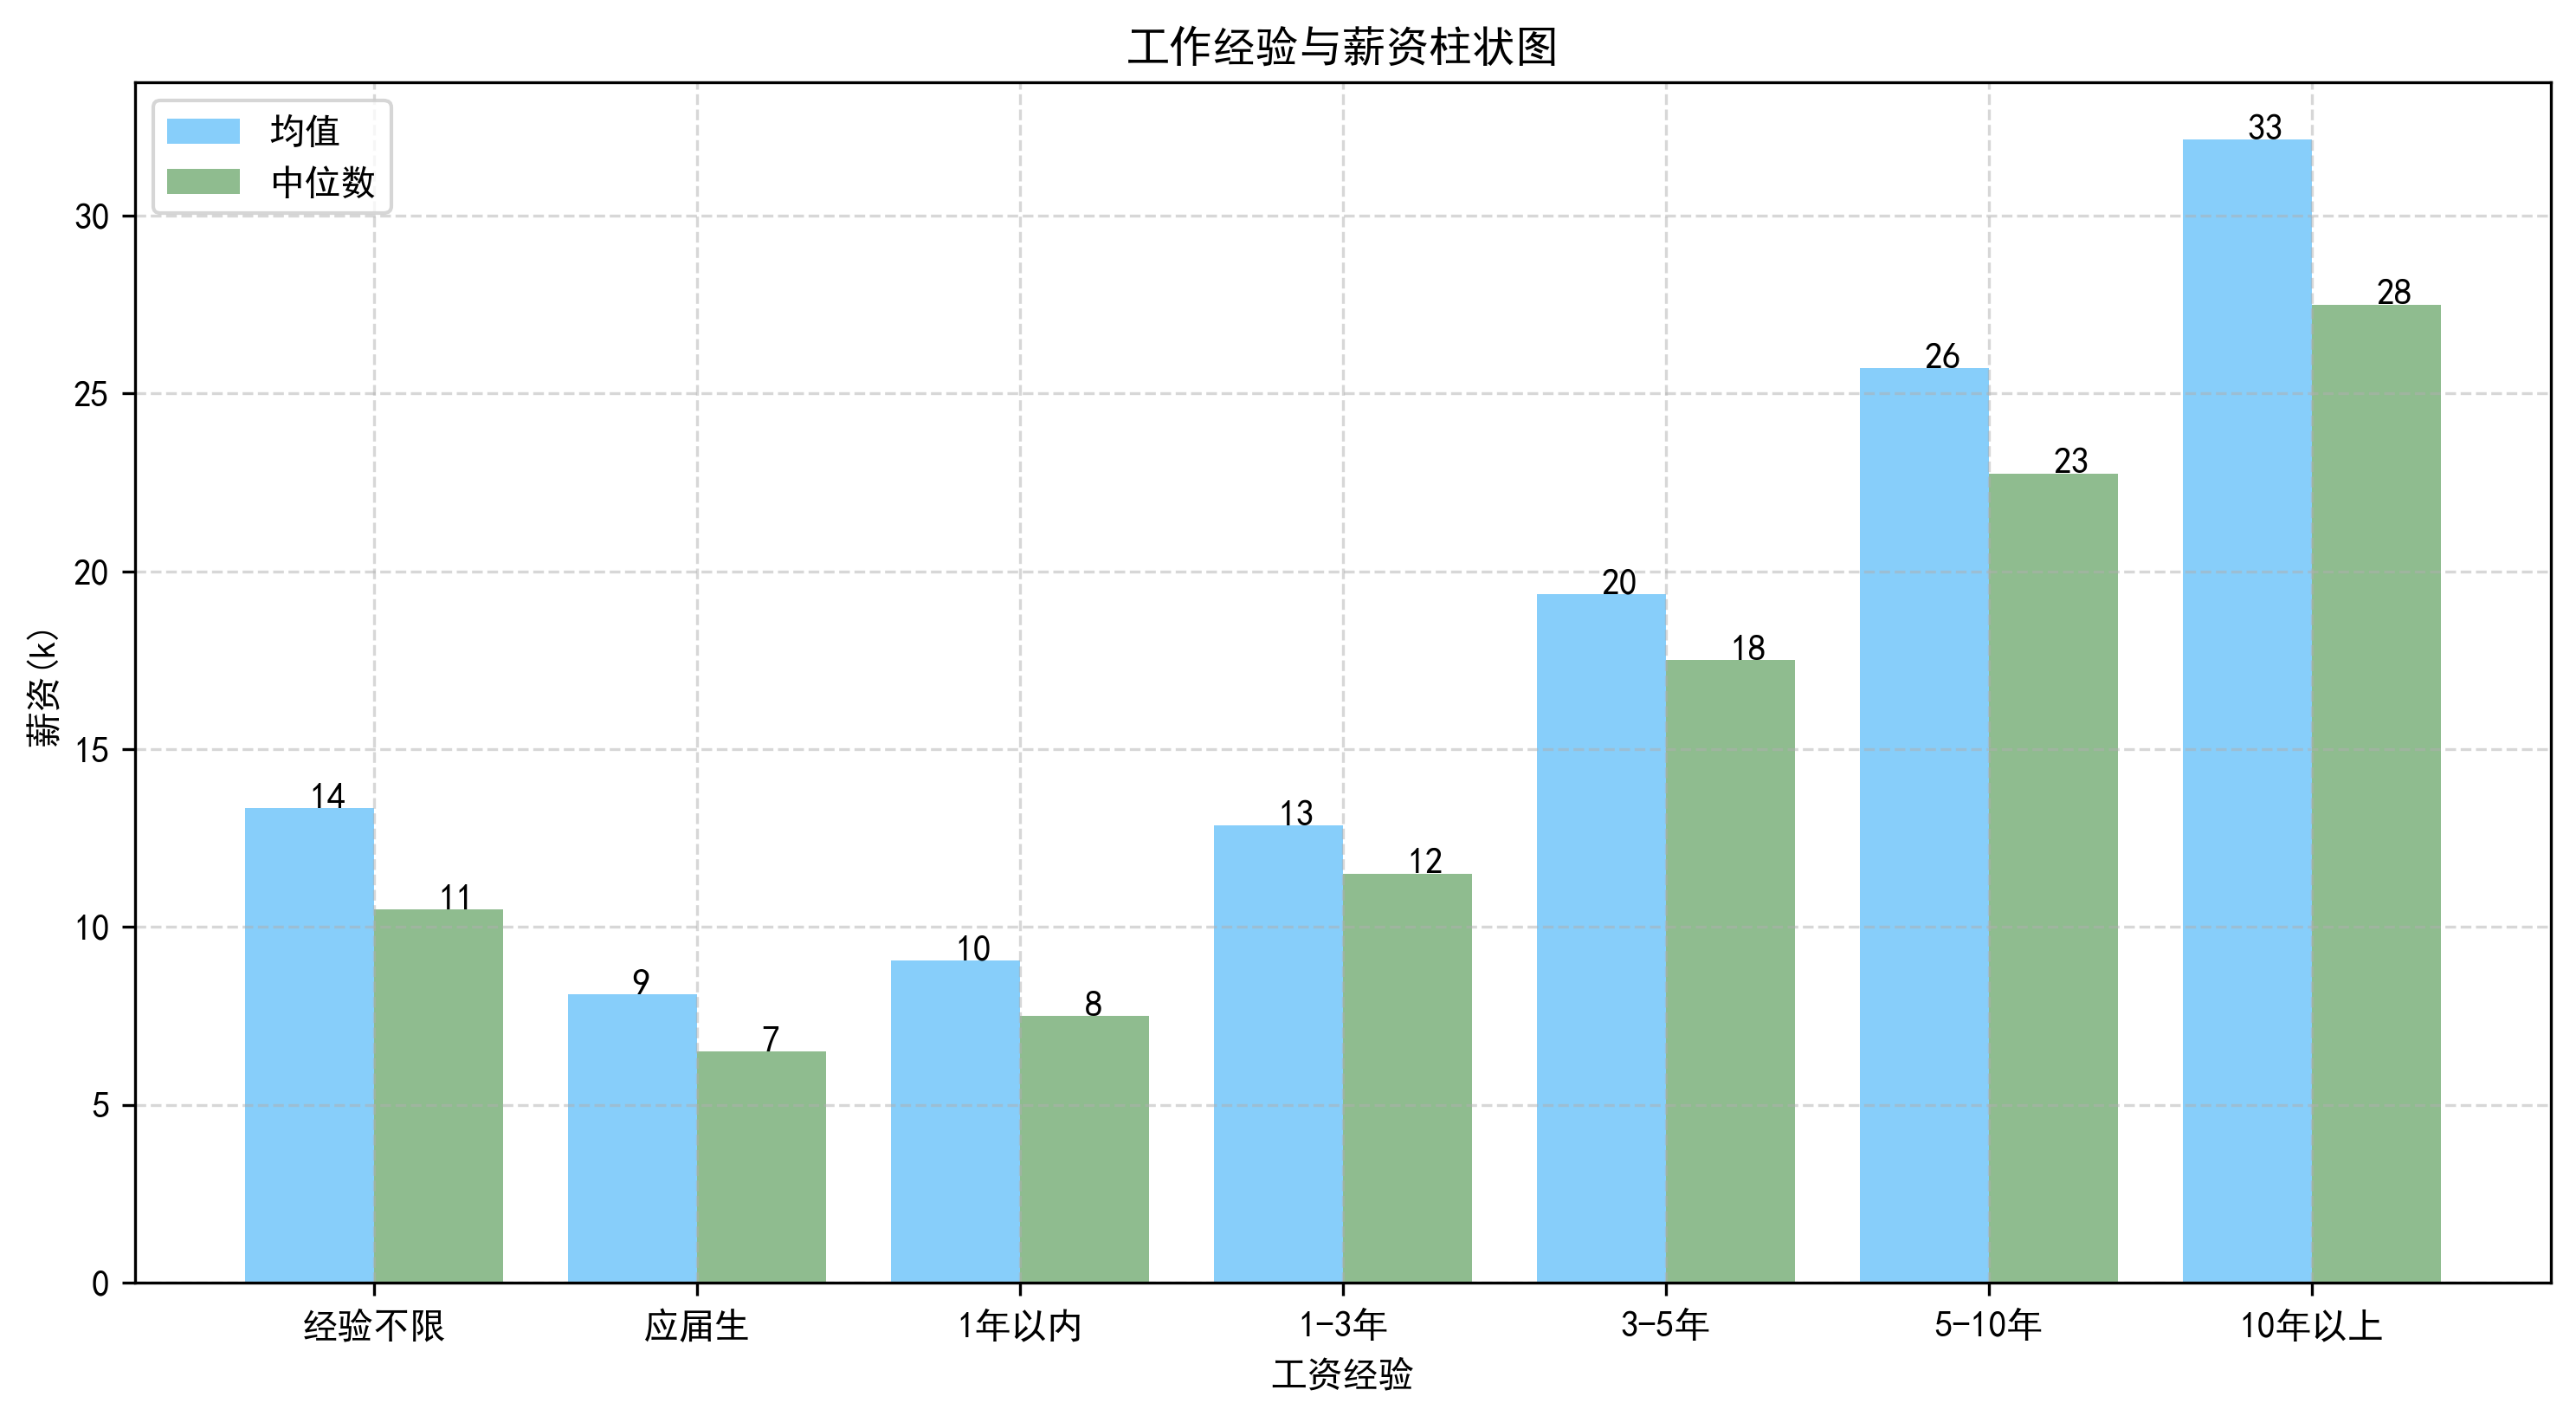

In [21]:
# 像素300
plt.figure(figsize = (12, 6), dpi = 300)
# 计算均值
y1 = [df[df['experience']=='经验不限']['avg'].mean(), df[df['experience']=='应届生']['avg'].mean()]
y1 = y1 + [df[df['experience']=='1年以内']['avg'].mean()]
y1 = y1 + [df[df['experience']=='1-3年']['avg'].mean(), df[df['experience']=='3-5年']['avg'].mean()]
y1 = y1 + [df[df['experience']=='5-10年']['avg'].mean(), df[df['experience']=='10年以上']['avg'].mean()]

y2 = [df[df['experience']=='经验不限']['avg'].median(), df[df['experience']=='应届生']['avg'].median()]
y2 = y2 + [df[df['experience']=='1年以内']['avg'].median()]
y2 = y2 + [df[df['experience']=='1-3年']['avg'].median(), df[df['experience']=='3-5年']['avg'].median()]
y2 = y2 + [df[df['experience']=='5-10年']['avg'].median(), df[df['experience']=='10年以上']['avg'].median()]
# X轴坐标
x1 = ['经验不限', '应届生', '1年以内', '1-3年', '3-5年', '5-10年', '10年以上']
#绘制柱状图
plt.bar([1, 2, 3, 4, 5, 6, 7], y1, width = 0.4, color = 'lightskyblue', label = '均值')
plt.bar([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4], y2, width = 0.4, color = 'darkseagreen', label = '中位数')
plt.xticks([1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2], x1)
plt.ylabel('薪资(k)')
plt.xlabel('工资经验')
plt.legend(['均值','中位数'])
plt.title("工作经验与薪资柱状图")

# 薪资标签
for i, j in zip([1, 2, 3, 4, 5, 6, 7], y1):
    plt.text(i, j, '{}'.format(math.ceil(j)))
for i, j in zip([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4], y2):
    plt.text(i, j, '{}'.format(math.ceil(j)))

# 绘制网格
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [22]:
# 饼图
p = Pie()
p.add('', [list(z) for z in zip( ['3-5年', '1-3年', '5-10年', '经验不限', '1年以内', '应届生', '10年以上'], df['experience'].value_counts())], radius=['35%', '60%'], rosetype='radius')
p.set_global_opts(title_opts=opts.TitleOpts(title='工资分布'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
p.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
p.set_colors(['#EF9050', '#3B7BA9', '#6FB27C', '#FFAF34', '#D8BFD8', '#00BFFF'])
p.render_notebook()


In [23]:
df['city'].value_counts()

city
深圳    1180
上海    1173
杭州    1166
北京    1162
广州    1118
南京    1064
武汉    1009
成都     992
西安     904
Name: count, dtype: int64

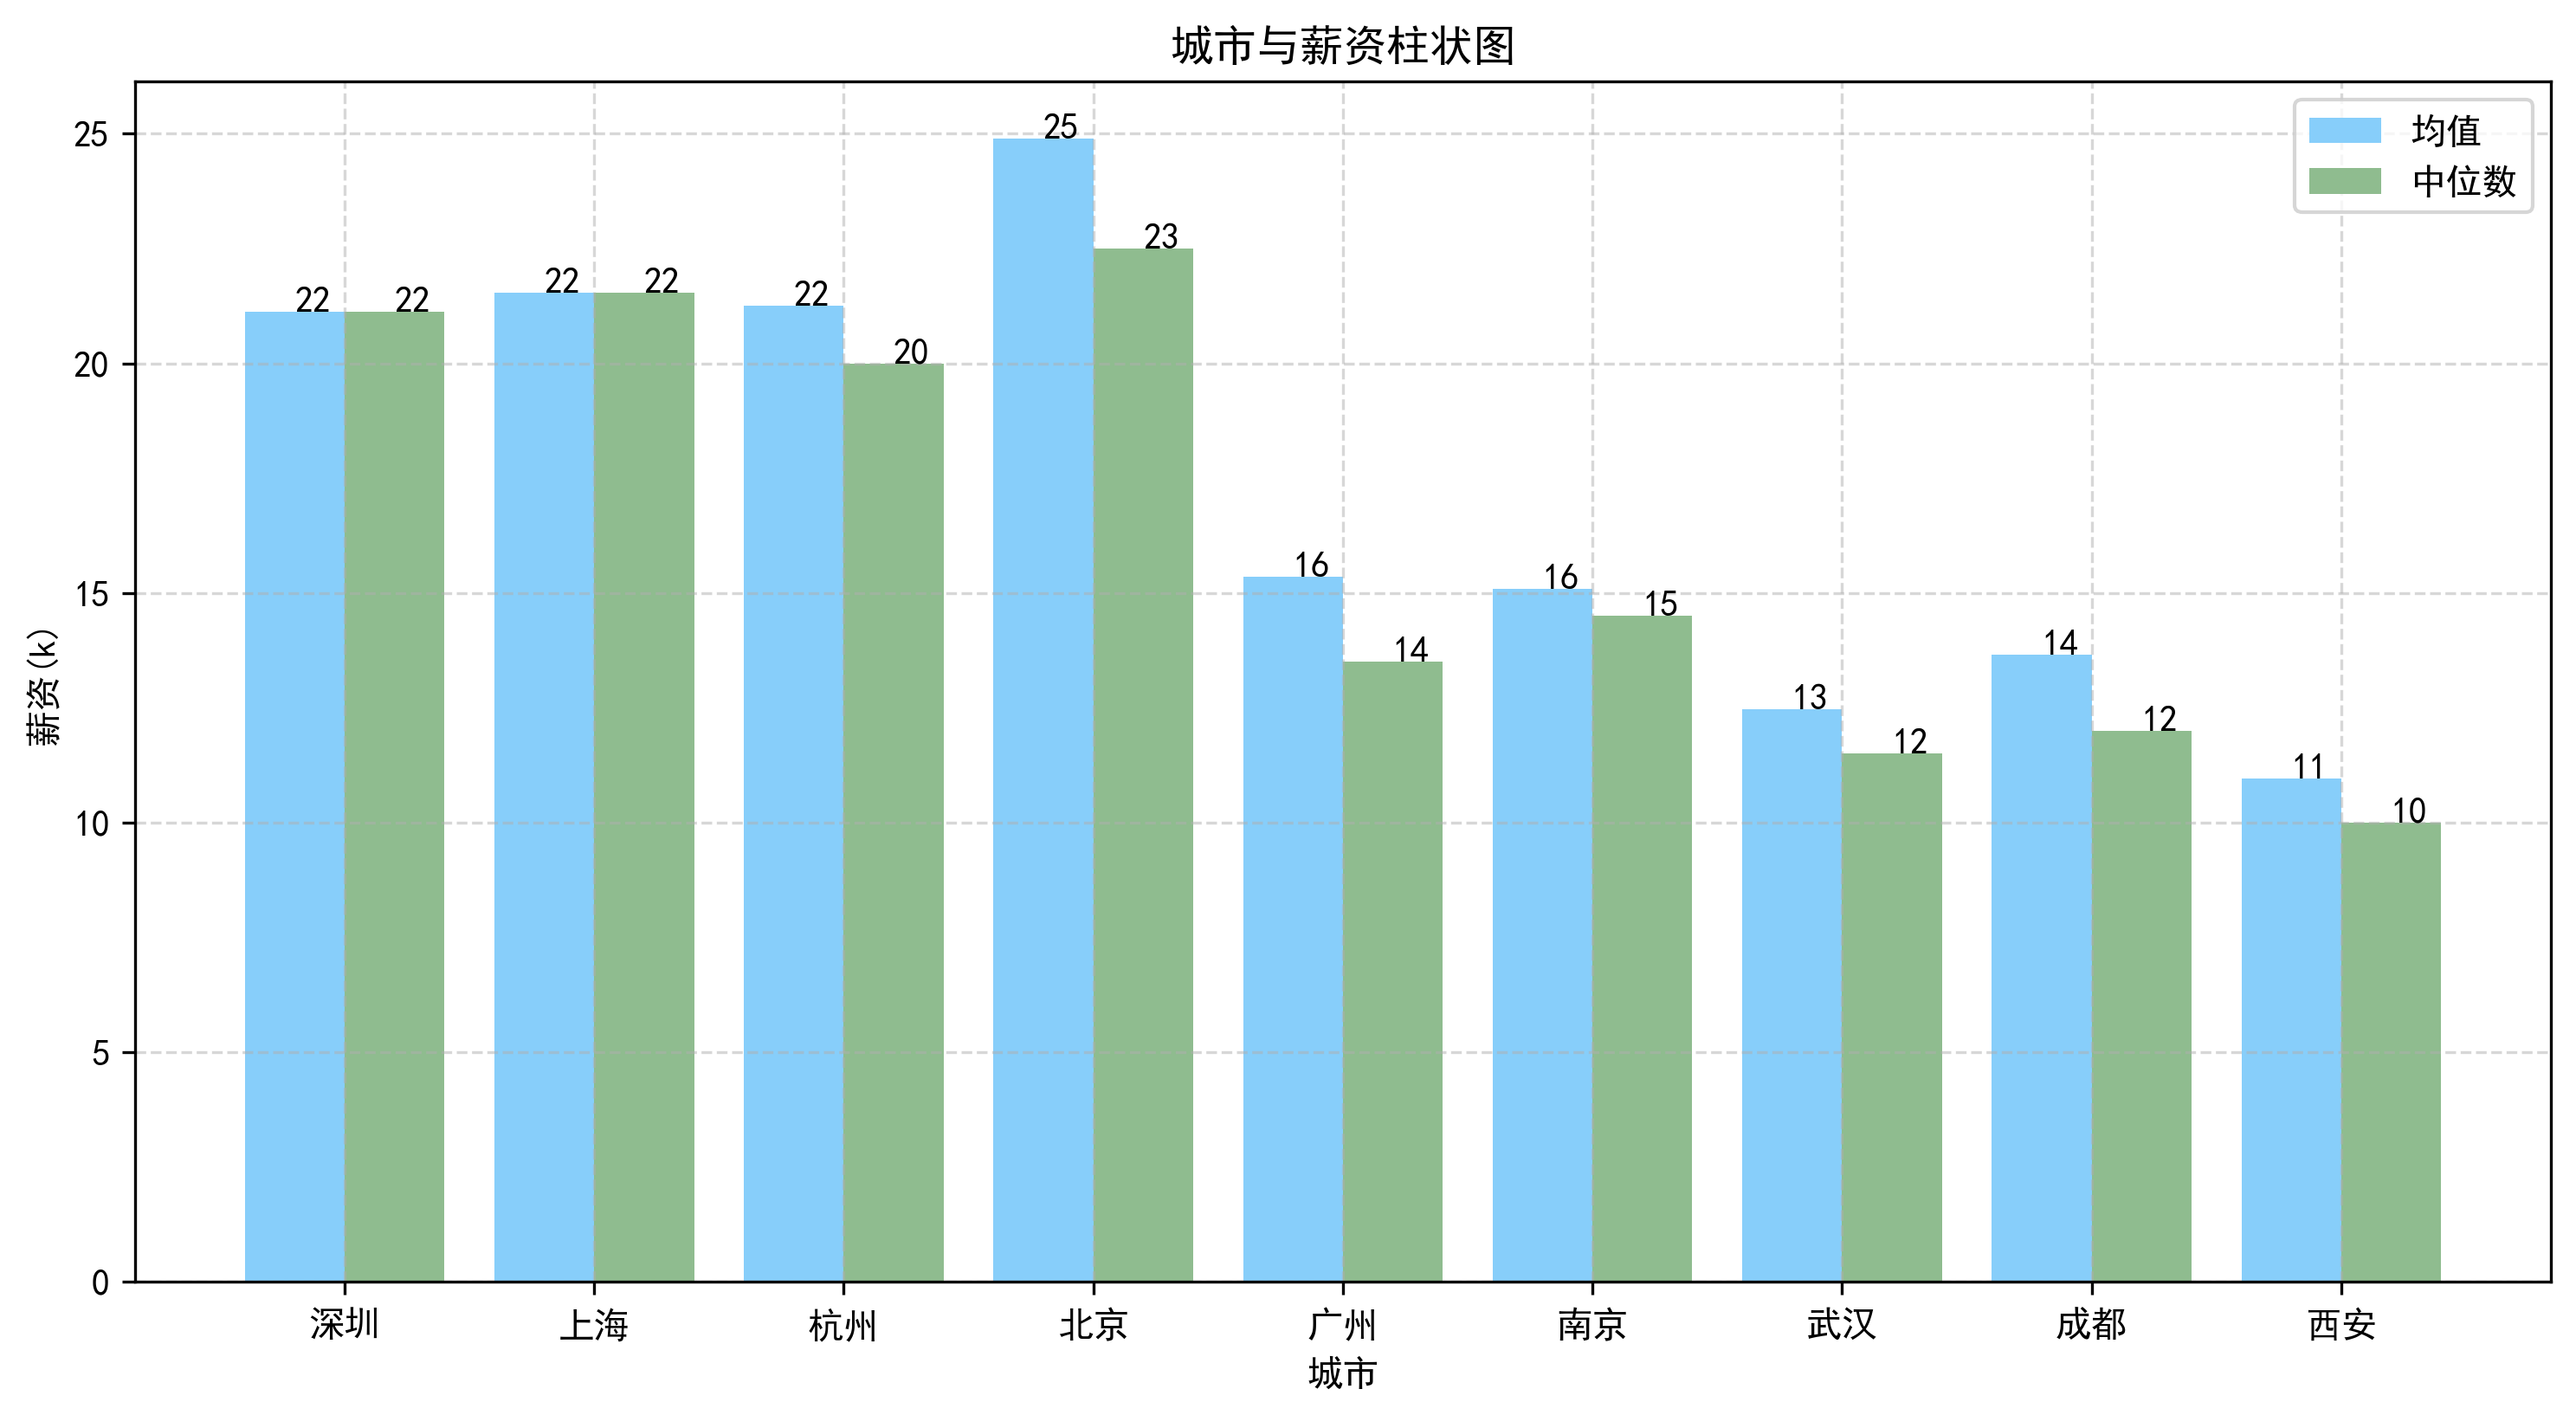

In [24]:
# 像素300
plt.figure(figsize = (12, 6), dpi = 300)
# 计算均值
y1 = [df[df['city']=='深圳']['avg'].mean(), df[df['city']=='上海']['avg'].mean()]
y1 = y1 + [df[df['city']=='杭州']['avg'].mean()]
y1 = y1 + [df[df['city']=='北京']['avg'].mean(), df[df['city']=='广州']['avg'].mean()]
y1 = y1 + [df[df['city']=='南京']['avg'].mean(), df[df['city']=='武汉']['avg'].mean()]
y1 = y1 + [df[df['city']=='成都']['avg'].mean(), df[df['city']=='西安']['avg'].mean()]
y2 = [df[df['city']=='深圳']['avg'].mean(), df[df['city']=='上海']['avg'].mean()]
y2 = y2 + [df[df['city']=='杭州']['avg'].median()]
y2 = y2 + [df[df['city']=='北京']['avg'].median(), df[df['city']=='广州']['avg'].median()]
y2 = y2 + [df[df['city']=='南京']['avg'].median(), df[df['city']=='武汉']['avg'].median()]
y2 = y2 + [df[df['city']=='成都']['avg'].median(), df[df['city']=='西安']['avg'].median()]
# X轴坐标
x1 = ['深圳', '上海', '杭州', '北京', '广州', '南京', '武汉', '成都', '西安']
#绘制柱状图
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], y1, width = 0.4, color = 'lightskyblue', label = '均值')
plt.bar([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4, 9.4], y2, width = 0.4, color = 'darkseagreen', label = '中位数')
plt.xticks([1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2, 9.2], x1)
plt.ylabel('薪资(k)')
plt.xlabel('城市')
plt.legend(['均值','中位数'])
plt.title("城市与薪资柱状图")

# 薪资标签
for i, j in zip([1, 2, 3, 4, 5, 6, 7, 8, 9], y1):
    plt.text(i, j, '{}'.format(math.ceil(j)))
for i, j in zip([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4, 9.4], y2):
    plt.text(i, j, '{}'.format(math.ceil(j)))

# 绘制网格
plt.grid(alpha=0.5, linestyle='--')
plt.show()


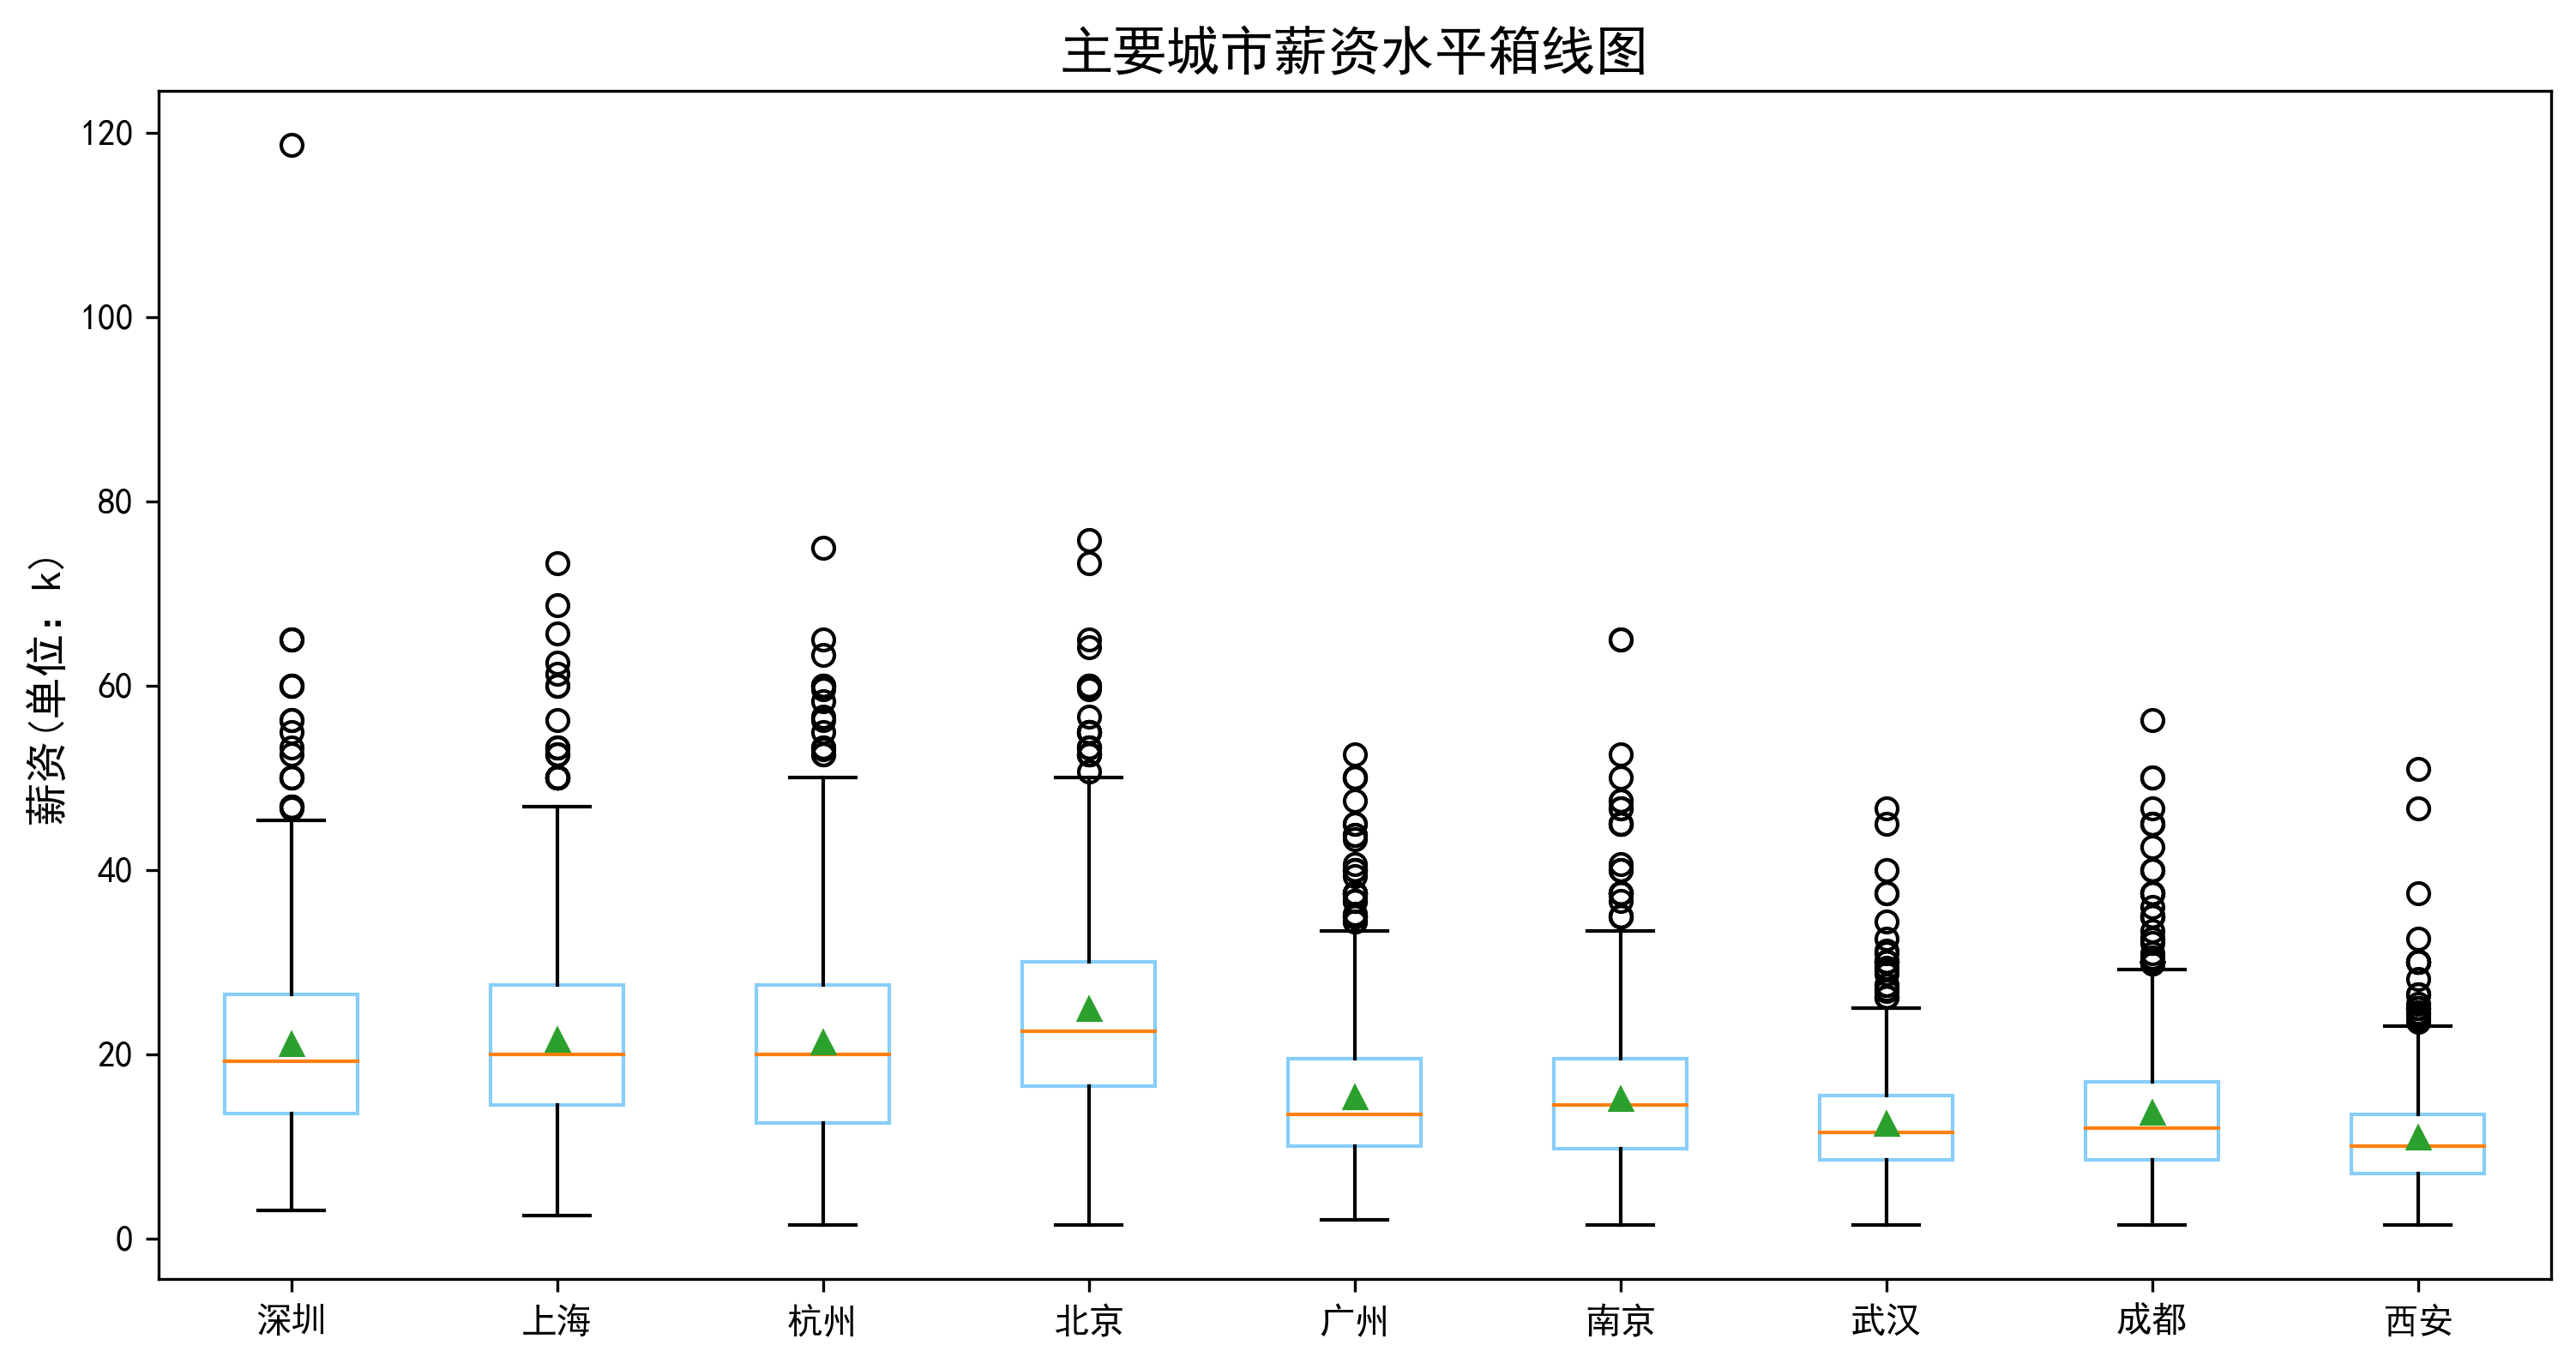

In [25]:
plt.figure(figsize = (12, 6), dpi = 300)

data1 = df[df['city']=='深圳']['avg']
data2 = df[df['city']=='上海']['avg']
data3 = df[df['city']=='杭州']['avg']
data4 = df[df['city']=='北京']['avg']
data5 = df[df['city']=='广州']['avg']
data6 = df[df['city']=='南京']['avg']
data7 = df[df['city']=='武汉']['avg']
data8 = df[df['city']=='成都']['avg']
data9 = df[df['city']=='西安']['avg']
y1 = [data1, data2, data3, data4, data5, data6, data7, data8, data9]
x1 = ['深圳', '上海', '杭州', '北京', '广州', '南京', '武汉', '成都', '西安']

plt.boxplot(y1,labels=x1,showmeans=True,patch_artist=True,boxprops={'color':'lightskyblue','facecolor':'white'})
plt.title('主要城市薪资水平箱线图',fontsize=15)
plt.ylabel('薪资(单位：k)',fontsize=12)
plt.show()